IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from numpy import mean
from numpy import std

In [4]:
# LOADING THE DATASET

df = pd.read_excel('HealthCareData.xlsx')
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [5]:
# ROWS & COLUMNS IN THE DATASET

rows, columns = df.shape

print(f'Total number of rows: {rows}')
print(f'Total number of columns: {columns}')

Total number of rows: 950
Total number of columns: 42


In [6]:
df.describe()

,S.NO,Age,Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),TCH,HDL,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),...,Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L)
count,950.000000,950.000000,950.000000,950.000000,591.000000,582.000000,950.000000,920.000000,398.000000,941.000000,...,901.000000,950.000000,950.000000,895.000000,889.000000,941.000000,921.000000,940.000000,950.000000,950.000000
mean,475.500000,50.632632,20.606316,5.158947,197.544839,35.486254,10.263979,33.810000,3.390704,87.651435,...,0.498557,475.130042,4.040737,2.457542,5.590326,2.797131,3.245060,132.524468,81.794737,61.565263
std,274.385677,8.808272,7.980664,22.908785,26.694968,7.982057,1.942300,5.751592,0.937089,13.844181,...,0.712546,6515.406159,2.757443,1.093691,1.314308,2.198999,1.341187,27.462559,31.106923,31.306928
min,1.000000,32.000000,4.000000,1.000000,100.000000,25.000000,4.000000,12.000000,1.000000,60.000000,...,0.000000,0.520000,0.800000,0.200000,2.500000,0.900000,1.000000,56.000000,32.000000,23.000000
25%,238.250000,44.000000,15.000000,2.000000,180.000000,30.000000,9.000000,30.000000,2.825000,78.000000,...,0.000000,1.200000,2.700000,2.000000,4.800000,2.000000,2.500000,110.000000,59.000000,41.000000
50%,475.500000,50.000000,20.000000,2.000000,194.000000,35.000000,10.000000,35.000000,3.500000,87.000000,...,0.000000,1.420000,3.700000,2.300000,6.000000,2.500000,3.100000,130.000000,74.000000,49.000000
75%,712.750000,57.000000,26.000000,3.000000,210.000000,38.000000,11.500000,38.000000,4.000000,94.000000,...,1.000000,1.700000,4.200000,3.000000,6.400000,3.000000,4.000000,150.000000,96.000000,76.000000
max,950.000000,80.000000,45.000000,180.000000,296.000000,81.000000,15.900000,48.000000,5.700000,126.000000,...,4.000000,90000.000000,25.000000,6.600000,8.300000,22.000000,30.000000,206.000000,204.000000,216.000000


In [7]:
df['Diabetes Result'].unique()

array(['YES', 'NO'], dtype=object)

In [8]:
df['Gender'].value_counts()

,count
Gender,
male,739
female,195
female,11
transgender,5


In [9]:
df['Gender'] = df['Gender'].replace('female ','female')

In [10]:
df['Gender'].value_counts()

,count
Gender,
male,739
female,206
transgender,5


In [11]:
df = df.rename(columns={'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)' : 'Outcome'})
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [12]:
df['Outcome'].unique()

array(['YES', nan, 'no'], dtype=object)

In [13]:
df['Diabetes Result'].value_counts()

,count
Diabetes Result,
YES,647
NO,303


In [14]:
df.columns

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'RBC  (million cells/microliter)', 'MCV   (femtoliters/cell)',
       'MCH  (picograms/cell)', 'MCHC  (grams/deciliter)', 'Total Count',
       'Polymorphs  (%) ', 'Lymphocytes  (%)', 'Monocytes   (%)',
       'Eosinophils   (%)', 'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Ab

In [15]:
df.shape

(950, 42)

In [16]:
df.isnull().any()

,0
S.NO,False
Age,False
Gender,False
Place(location where the patient lives),True
Duration of alcohol consumption(years),False
Quantity of alcohol consumption (quarters/day),False
Type of alcohol consumed,False
Hepatitis B infection,False
Hepatitis C infection,False
Diabetes Result,False


In [17]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),134
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
# This code selects all object-type columns (categorical data) from the DataFrame `df` and retrieves their column names.

categorical_features = df.select_dtypes(include=[object])
categorical_features.columns

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'A/G Ratio',
       'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='object')

In [20]:
#This code selects all numeric-type columns from the DataFrame `df` and retrieves their column names.

numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['S.NO', 'Age', 'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)', 'TCH', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)',
       'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)',
       'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'SGPT/ALT (U/L)'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   S.NO                                            950 non-null    int64  
 1   Age                                             950 non-null    int64  
 2   Gender                                          950 non-null    object 
 3   Place(location where the patient lives)         816 non-null    object 
 4   Duration of alcohol consumption(years)          950 non-null    int64  
 5   Quantity of alcohol consumption (quarters/day)  950 non-null    int64  
 6   Type of alcohol consumed                        950 non-null    object 
 7   Hepatitis B infection                           950 non-null    object 
 8   Hepatitis C infection                           950 non-null    object 
 9   Diabetes Result                            

In [22]:
df['TCH']=df['TCH'].fillna(df['TCH'].mean())
df['HDL']=df['HDL'].fillna(df['HDL'].mean())
df['PCV  (%)']=df['PCV  (%)'].fillna(df['PCV  (%)'].mean())
df['RBC  (million cells/microliter)']=df['RBC  (million cells/microliter)'].fillna(df['RBC  (million cells/microliter)'].mean())
df['MCV   (femtoliters/cell)']=df['MCV   (femtoliters/cell)'].fillna(df['MCV   (femtoliters/cell)'].mean())
df['MCH  (picograms/cell)']=df['MCH  (picograms/cell)'].fillna(df['MCH  (picograms/cell)'].mean())
df['MCHC  (grams/deciliter)']=df['MCHC  (grams/deciliter)'].fillna(df['MCHC  (grams/deciliter)'].mean())
df['Total Count']=df['Total Count'].fillna(df['Total Count'].mean())
df['Monocytes   (%)']=df['Monocytes   (%)'].fillna(df['Monocytes   (%)'].mean())
df['Eosinophils   (%)']=df['Eosinophils   (%)'].fillna(df['Eosinophils   (%)'].mean())
df['Basophils  (%)']=df['Basophils  (%)'].fillna(df['Basophils  (%)'].mean())
df['Indirect     (mg/dl)']=df['Indirect     (mg/dl)'].fillna(df['Indirect     (mg/dl)'].mean())
df['Total Protein     (g/dl)']=df['Total Protein     (g/dl)'].fillna(df['Total Protein     (g/dl)'].mean())
df['Albumin   (g/dl)']=df['Albumin   (g/dl)'].fillna(df['Albumin   (g/dl)'].mean())
df['Globulin  (g/dl)']=df['Globulin  (g/dl)'].fillna(df['Globulin  (g/dl)'].mean())
df['AL.Phosphatase      (U/L)']=df['AL.Phosphatase      (U/L)'].fillna(df['AL.Phosphatase      (U/L)'].mean())
df['Place(location where the patient lives)']=df['Place(location where the patient lives)'].fillna(df['Place(location where the patient lives)'].mode()[0])
df['TG']=df['TG'].fillna(df['TG'].mode()[0])
df['LDL']=df['LDL'].fillna(df['LDL'].mode()[0])
df['Outcome']=df['Outcome'].fillna(df['Outcome'].mode()[0])
df['Total Bilirubin    (mg/dl)']=df['Total Bilirubin    (mg/dl)'].fillna(df['Total Bilirubin    (mg/dl)'].mode()[0])

In [23]:
df['A/G Ratio']=df['A/G Ratio'].fillna(df['A/G Ratio'].mode()[0])

In [24]:
df.isnull().sum()

,0
S.NO,0
Age,0
Gender,0
Place(location where the patient lives),0
Duration of alcohol consumption(years),0
Quantity of alcohol consumption (quarters/day),0
Type of alcohol consumed,0
Hepatitis B infection,0
Hepatitis C infection,0
Diabetes Result,0


In [25]:
df['Total Bilirubin    (mg/dl)'].unique()

array([7, 6, 5.2, 8.4, 4.4, 9, 10, 4.8, 8, 10.9, 7.2, 11, 5.1, 6.4, 5.7,
       9.2, 8.6, 8.2, 3.2, 8.9, 7.8, 8.3, 5.8, 7.6, 7.5, 5.4, 5.6, 4, 7.1,
       3, 5, 6.6, 2, 4.6, 6.2, 1.4, 4.2, 6.9, 6.8, 4.5, 1.2, 4.3, 4.7,
       8.7, 0.5, 0.7, 'o.4', 0.3, 0.6], dtype=object)

In [26]:
df['A/G Ratio'].unique()

array([0.75, 0.575, 0.5, 1.214, 0.31, '0.5.', 0.25, 0.6, 1.66, 0.8, 2.2,
       0.84, 0.78, 0.77, 0.87, 2.45, datetime.time(0, 1, 2, 200000),
       datetime.time(1, 2), datetime.time(1, 1),
       datetime.time(0, 1, 0, 875000), datetime.time(0, 1, 3, 500000),
       datetime.time(1, 3), '1.5:1', '0.6:1',
       datetime.time(0, 1, 3, 100000), datetime.time(0, 1, 1, 500000),
       datetime.datetime(1900, 1, 1, 0, 0), datetime.time(3, 1),
       datetime.time(2, 3), datetime.time(2, 1), datetime.time(12, 0),
       datetime.datetime(1900, 1, 3, 0, 0),
       datetime.datetime(1900, 1, 2, 0, 0), 0.72,
       datetime.datetime(1900, 1, 1, 4, 24),
       datetime.datetime(1900, 1, 1, 5, 24),
       datetime.datetime(1900, 1, 1, 6, 24), 0.42, 0.44, 0.86, 0.48, 1.18,
       1.68, 1.8], dtype=object)

In [27]:
df.drop(['A/G Ratio', 'Total Bilirubin    (mg/dl)','S.NO'], axis = 1, inplace = True)

In [28]:
df['TG'].unique()

array([115, 160, 170, 120, 162, 166, 188, 86, 130, 168, 118, 184, 151,
       100, 156, 186, 197, 177, 172, 173, 150, 174, 190, 140, 136, 180,
       171, 144, 176, 206, 139, 146, '130LDL', 192, 195, 200, 189, 178,
       106, 164], dtype=object)

In [29]:
df[df['TG'].isin(['130LDL'])]

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Blood pressure (mmhg),...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
588,51,female,rural,26,2,both,negative,negative,NO,126/86,...,0.8,1.2,8.0,2.0,6.0,102.0,86,76,YES,YES


In [30]:
df.drop(df.index[[588]],inplace=True,axis=0)

In [31]:
df['TG'].unique()

array([115, 160, 170, 120, 162, 166, 188, 86, 130, 168, 118, 184, 151,
       100, 156, 186, 197, 177, 172, 173, 150, 174, 190, 140, 136, 180,
       171, 144, 176, 206, 139, 146, 192, 195, 200, 189, 178, 106, 164],
      dtype=object)

In [32]:
# Identify columns with non-numeric values that were not caught by previous steps
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            pd.to_numeric(df[col])
        except ValueError:
            print(f"Column '{col}' contains non-numeric values.")

Column 'Gender' contains non-numeric values.
Column 'Place(location where the patient lives)' contains non-numeric values.
Column 'Type of alcohol consumed' contains non-numeric values.
Column 'Hepatitis B infection' contains non-numeric values.
Column 'Hepatitis C infection' contains non-numeric values.
Column 'Diabetes Result' contains non-numeric values.
Column 'Blood pressure (mmhg)' contains non-numeric values.
Column 'Obesity' contains non-numeric values.
Column 'Family history of cirrhosis/ hereditary' contains non-numeric values.
Column 'USG Abdomen (diffuse liver or  not)' contains non-numeric values.
Column 'Outcome' contains non-numeric values.


Text(0.0, 1.0, 'The count of Gender')

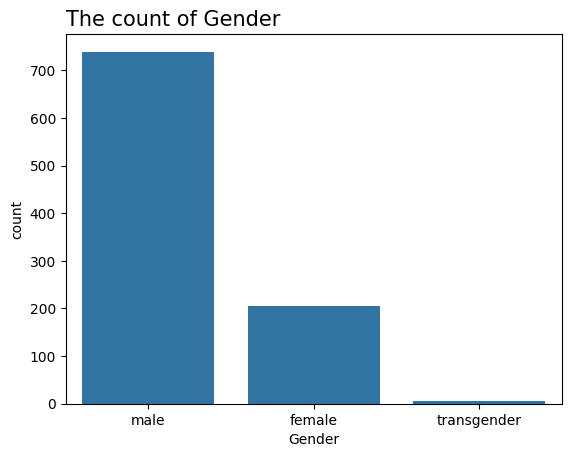

In [33]:
sns.countplot(data=df,x='Gender')
plt.title('The count of Gender',size = 15,loc='left')

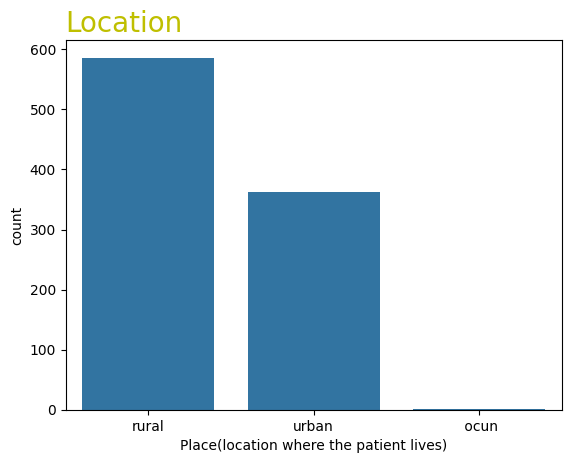

In [34]:
sns.countplot(data=df,x='Place(location where the patient lives)')
plt.title("Location",color='y',size=20,loc='left')
plt.show()

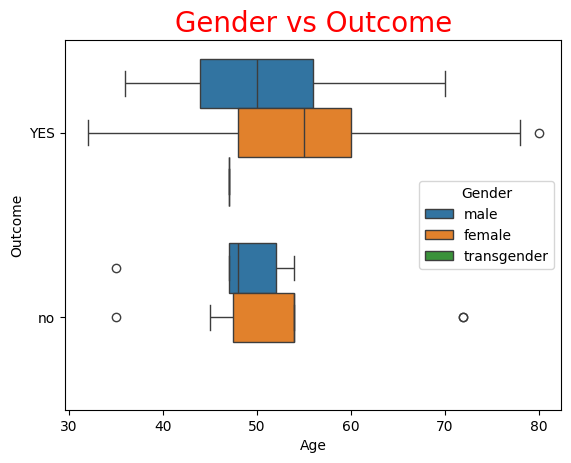

In [35]:
sns.boxplot(x='Age',y='Outcome',data=df,hue='Gender')
plt.title('Gender vs Outcome',color='red',size=20)
plt.show()

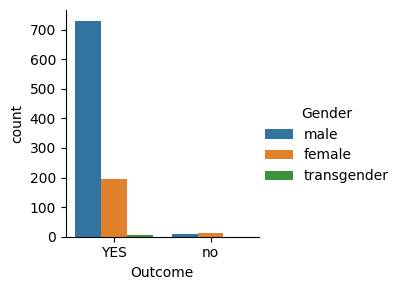

In [36]:
sns.catplot(x='Outcome',hue='Gender',data=df,kind='count',height=3)

Text(0.5, 1.0, 'Place vs Age')

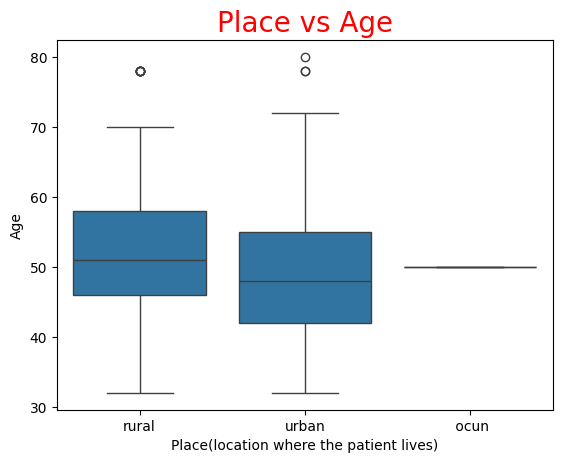

In [37]:
sns.boxplot(x='Place(location where the patient lives)',y='Age',data=df)
plt.title('Place vs Age',color='red',size=20)

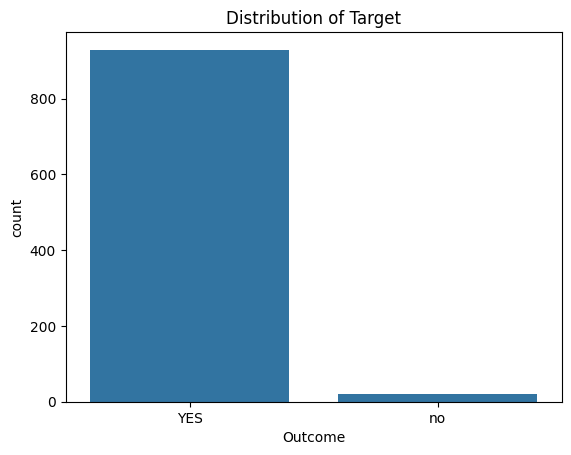

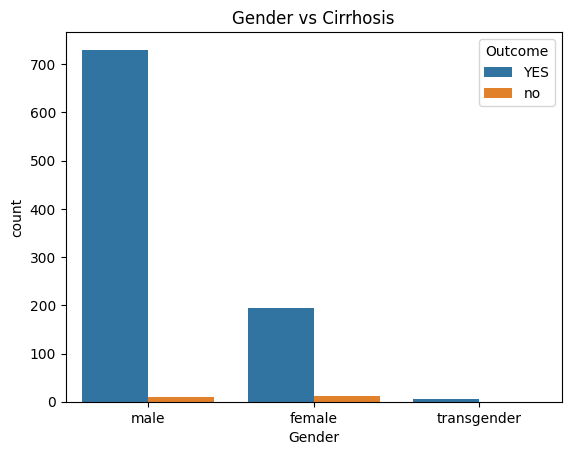

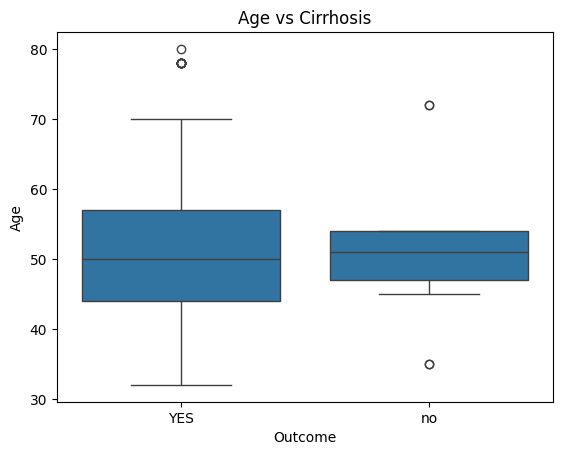

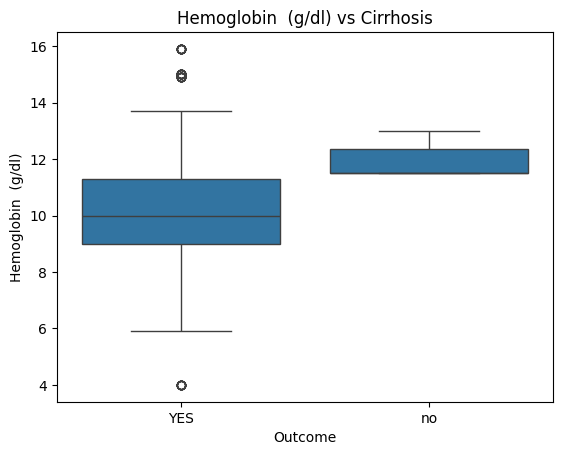

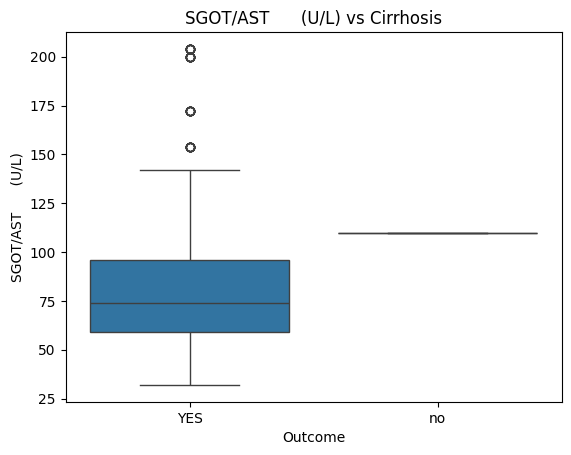

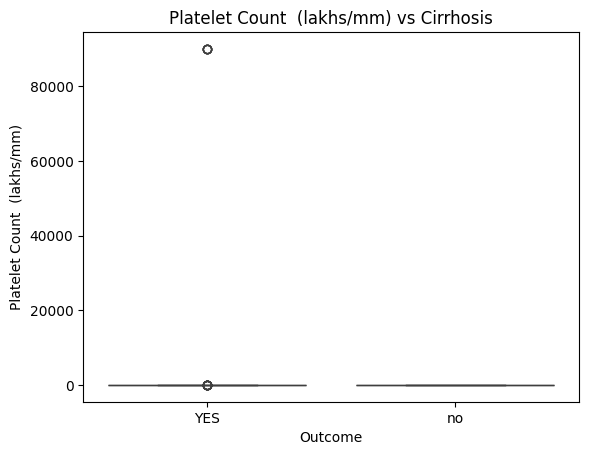

In [38]:
# Target distribution
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Target')
plt.show()

# Gender vs Cirrhosis
sns.countplot(x='Gender', hue='Outcome', data=df)
plt.title('Gender vs Cirrhosis')
plt.show()

# Boxplots of key features
features = ['Age', 'Hemoglobin  (g/dl)', 'SGOT/AST      (U/L)', 'Platelet Count  (lakhs/mm)']
for feature in features:
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs Cirrhosis')
    plt.show()

Plotting count plots for key categorical features...


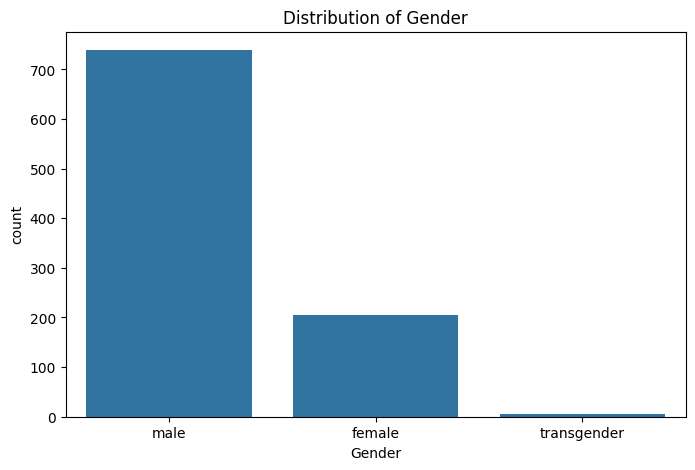

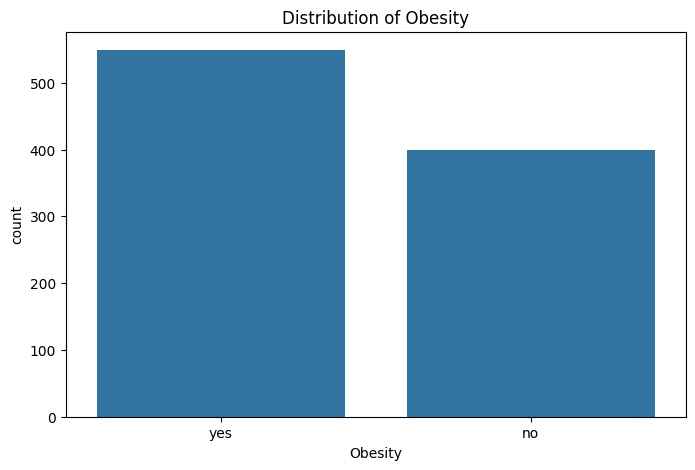

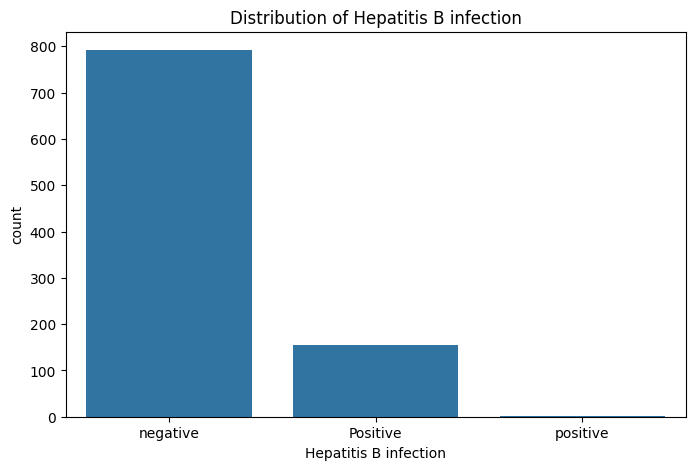

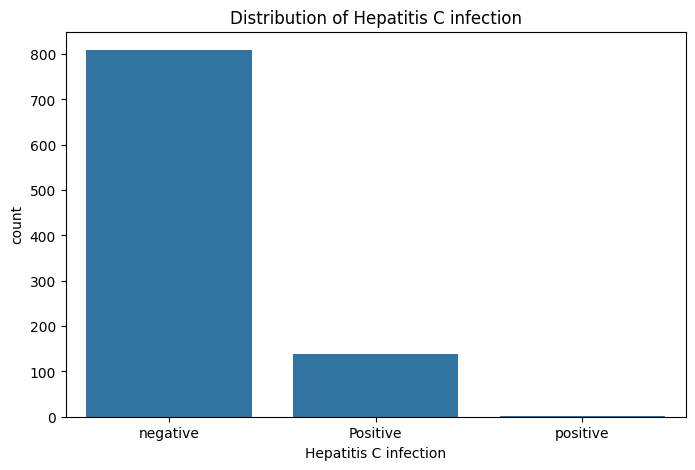

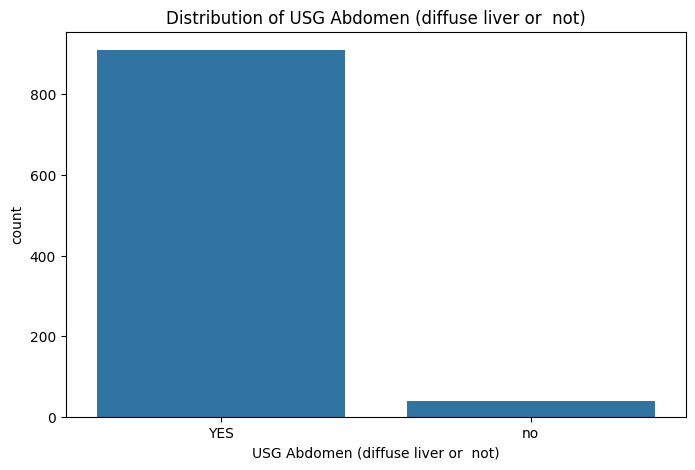

In [39]:
# Ensure df is available from the previous step
if 'df' not in locals():
    print("Error: df not found. Please run the data loading and cleaning cells.")
else:
    print("Plotting count plots for key categorical features...")
    # Use cleaned names for columns
    categorical_features_for_count_plot = ['Gender', 'Obesity', 'Hepatitis B infection', 'Hepatitis C infection', 'USG Abdomen (diffuse liver or  not)']

    for col in categorical_features_for_count_plot:
         if col in df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(data=df, x=col)
            plt.title(f'Distribution of {col}')
            plt.show()
         else:
             print(f"Warning: Column '{col}' not found for count plot.")


Plotting bar plots for key categorical features vs target...


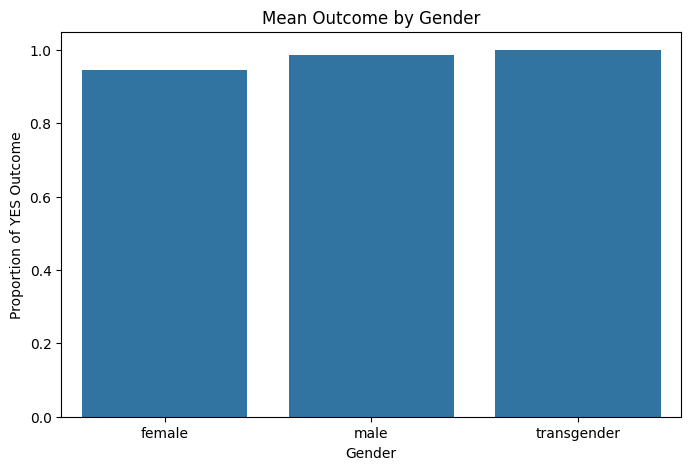

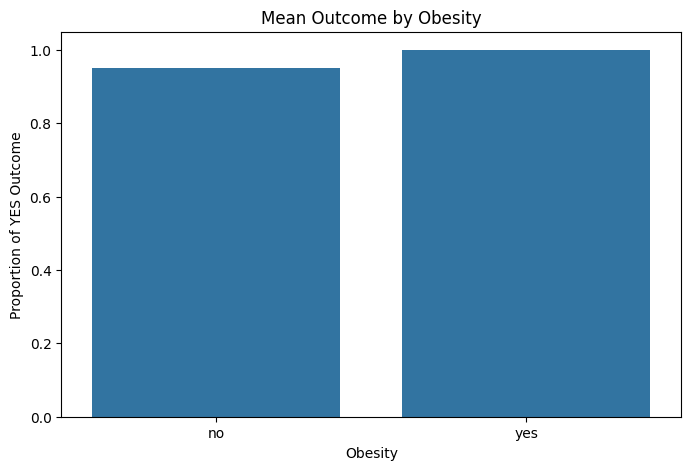

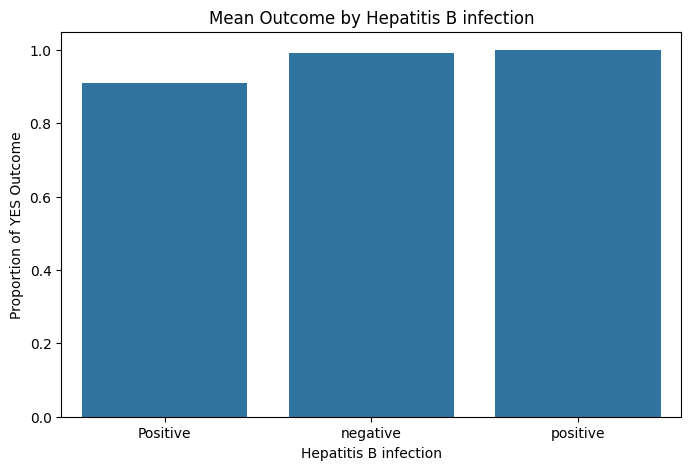

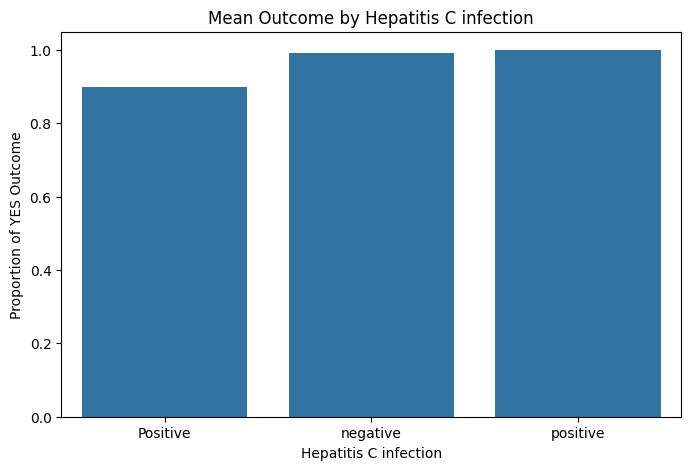

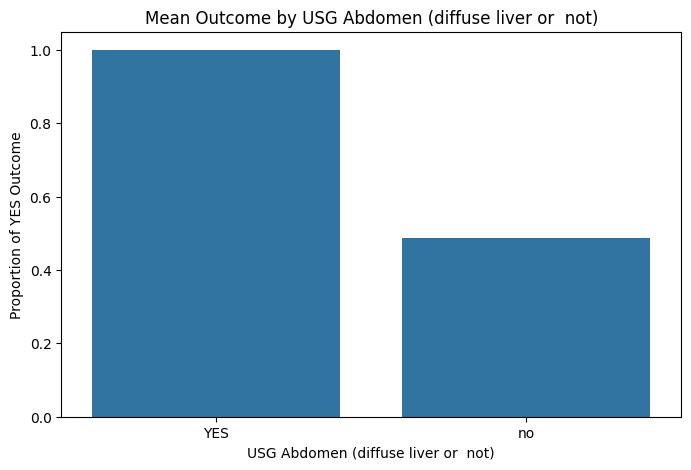

In [40]:
target_column_name = 'Outcome'

# Ensure df and target_column_name are available
if 'df' not in locals() or 'target_column_name' not in locals():
     print("Error: df or target_column_name not found. Please run the data cleaning cell.")
elif target_column_name not in df.columns:
     print(f"Error: Target column '{target_column_name}' not found in df.")
else:
    print("\nPlotting bar plots for key categorical features vs target...")
    # Use cleaned names for columns
    categorical_features_for_bivariate = ['Gender', 'Obesity', 'Hepatitis B infection', 'Hepatitis C infection', 'USG Abdomen (diffuse liver or  not)']

    for col in categorical_features_for_bivariate:
         if col in df.columns and df[col].nunique() <= 10: # Avoid plotting columns with too many unique values
            plt.figure(figsize=(8, 5))
            # Calculate the mean of the target for each category
            # Ensure the target column is in a format that can be averaged (e.g., numeric)
            # For now, assuming 'YES' and 'NO' can be handled by the plot or will be converted later
            mean_target_by_category = df.groupby(col)[target_column_name].agg(lambda x: (x == 'YES').mean()).reset_index()
            sns.barplot(data=mean_target_by_category, x=col, y=target_column_name)
            plt.title(f'Mean {target_column_name} by {col}')
            plt.ylabel(f'Proportion of YES Outcome')
            plt.show()
         else:
             if col in df.columns:
                  print(f"Skipping bar plot for '{col}' due to too many unique values.")
             else:
                  print(f"Warning: Column '{col}' not found for bar plot.")

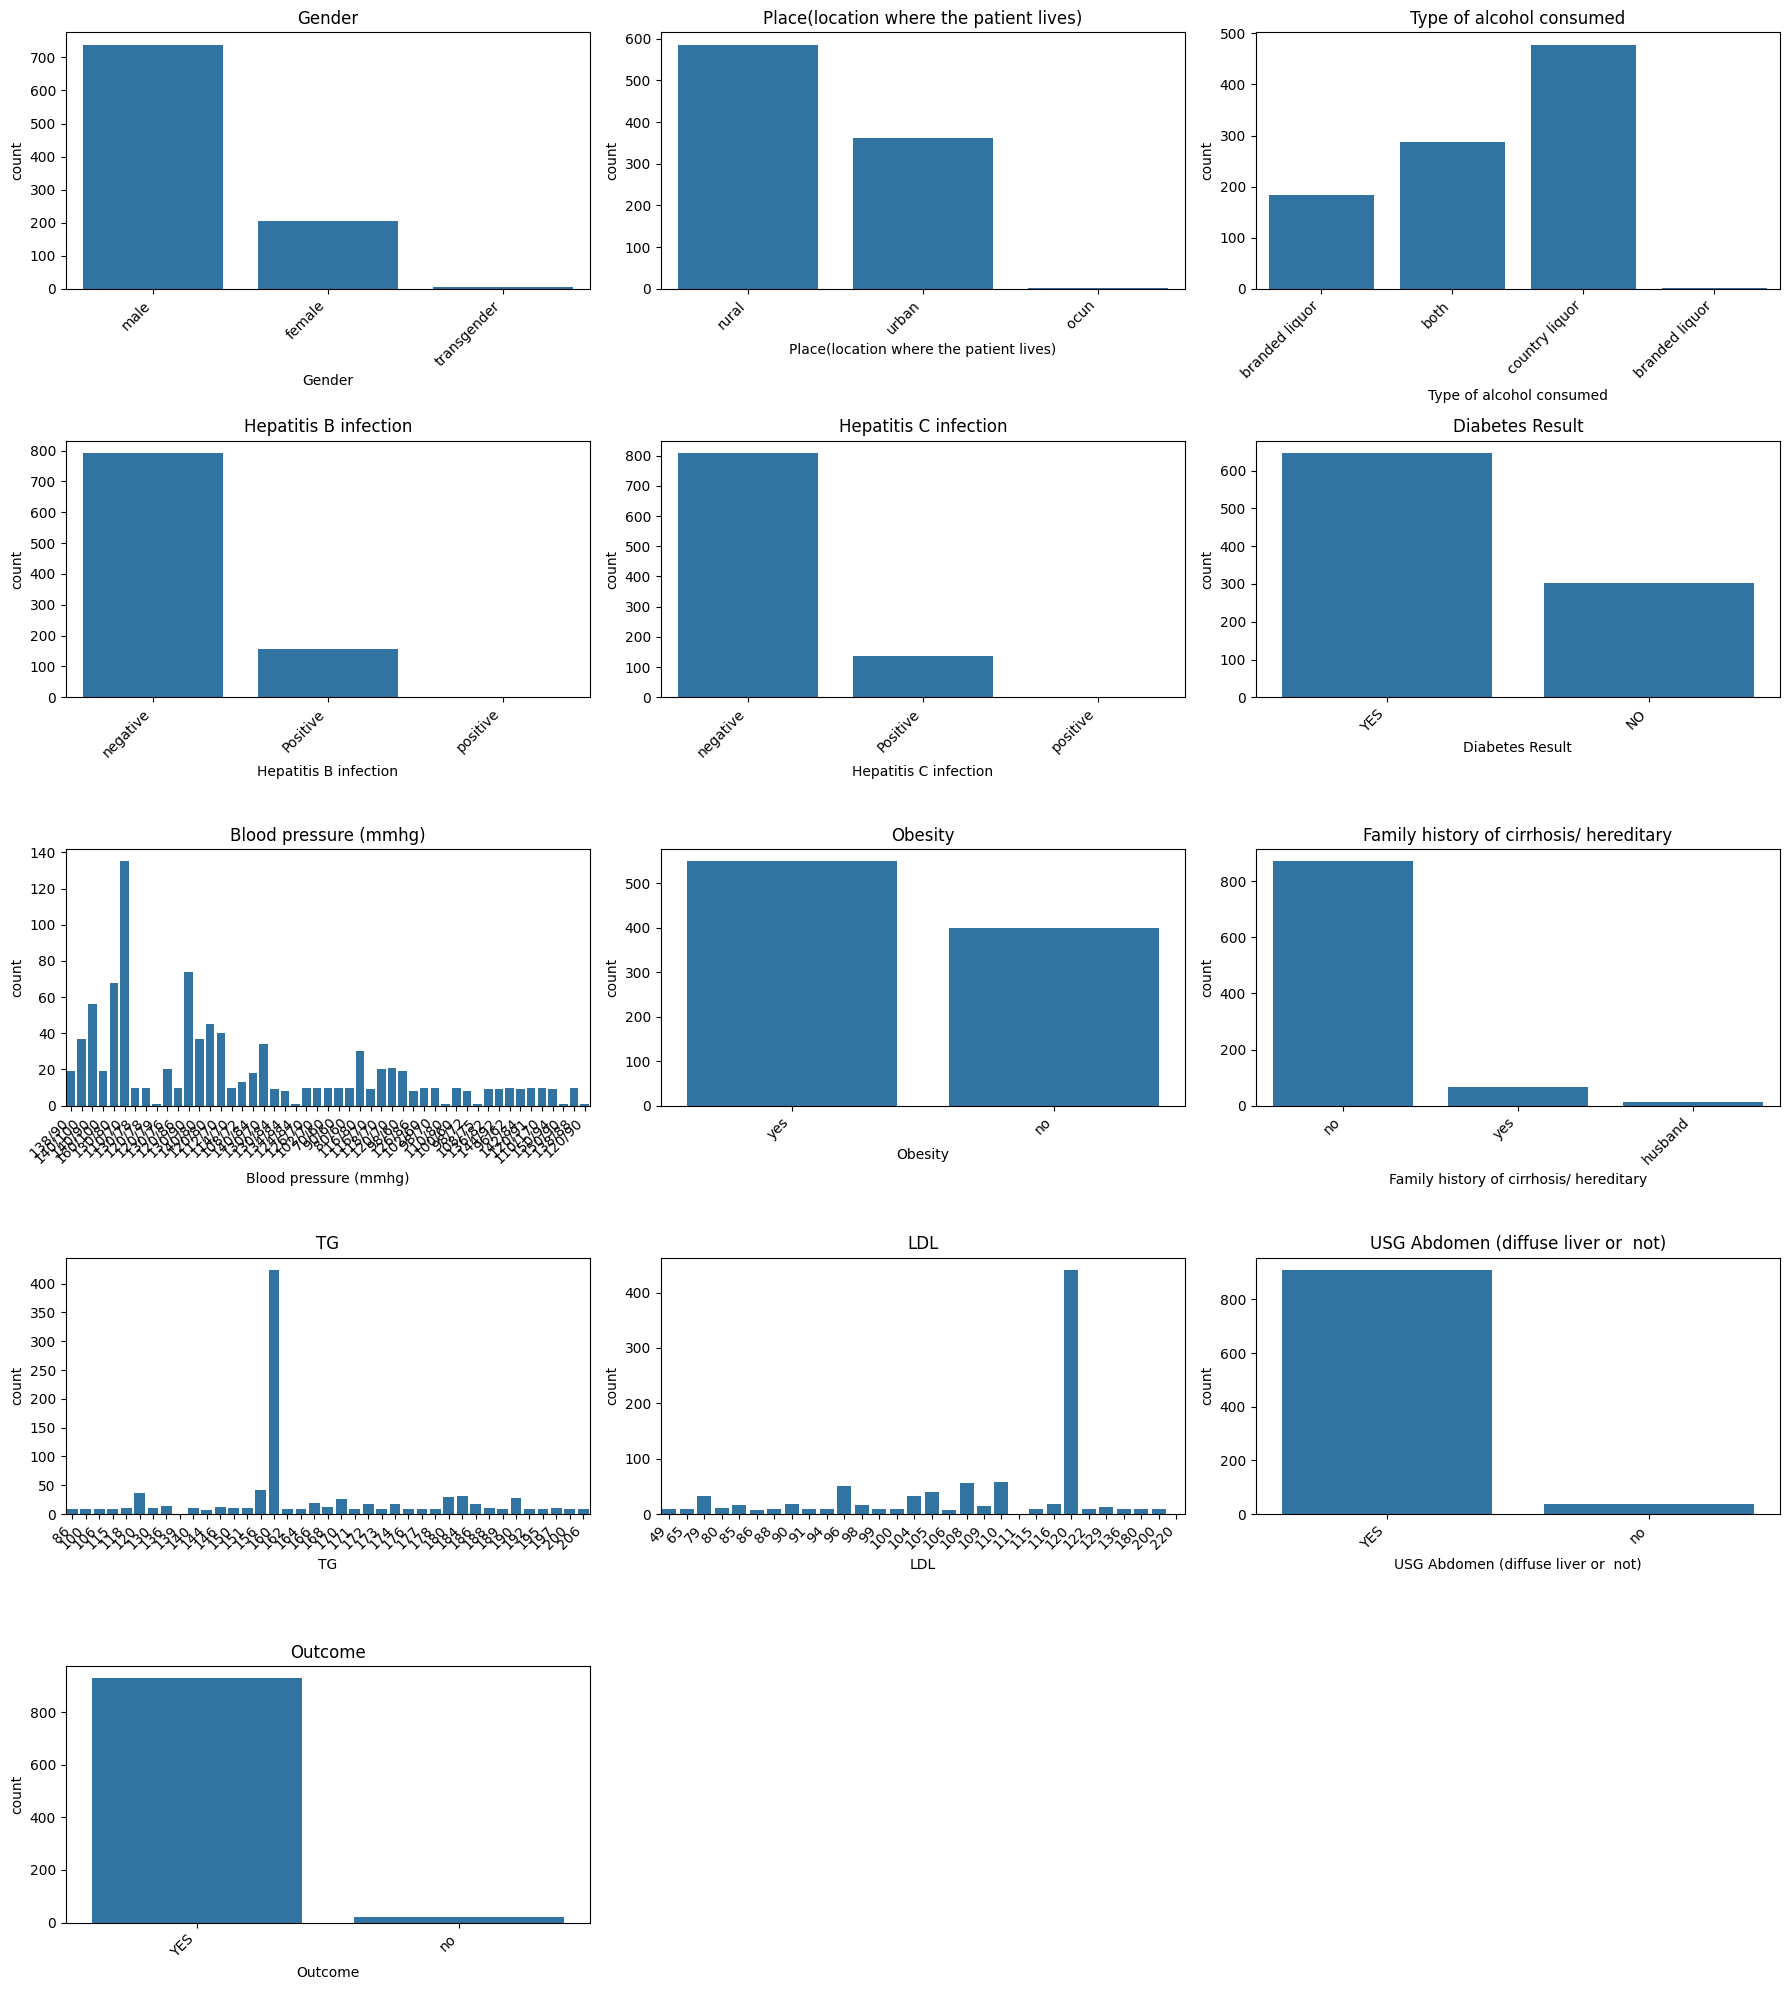

In [41]:
# Plot count plots for categorical features in a single figure with subplots
categorical_cols_for_plotting = [col for col in df.columns if df[col].dtype == 'object']
num_cols = 3 # Number of columns for subplots
num_rows = (len(categorical_cols_for_plotting) + num_cols - 1) // num_cols # Calculate number of rows needed

plt.figure(figsize=(num_cols * 6, num_rows * 4)) # Adjust figure size based on number of subplots

for i, col in enumerate(categorical_cols_for_plotting):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

SCALING & TRANSFORMING THE DATA

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
for column in df.columns:
    # Check if the column has categorical data
    if df[column].dtype == 'object':
        # Perform label encoding
        df[column] = le.fit_transform(df[column])

In [44]:
df.drop(['Hepatitis B infection','LDL','TG','HDL'],axis=1,inplace=True)

In [45]:
df.drop(['Hepatitis C infection','TCH'],axis=1,inplace=True)

spliting

In [46]:
df.columns

Index(['Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'RBC  (million cells/microliter)',
       'MCV   (femtoliters/cell)', 'MCH  (picograms/cell)',
       'MCHC  (grams/deciliter)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)',
       'SGPT/ALT (U/L)', 'USG Abdomen (diffuse liver or  not)', 'Outcome'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Diabetes Result', axis=1)
y = df['Diabetes Result']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, you can check the shape of X_train, X_test, y_train, y_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (759, 32)
X_test shape: (190, 32)
y_train shape: (759,)
y_test shape: (190,)


In [48]:
X_train

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),...,Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
936,72,0,2,4,3,2,16,0,1,12.30,...,1.0,2.0,5.300000,4.2,3.5,110.0,110,70,1,1
290,52,1,2,12,1,3,23,0,1,10.20,...,4.0,3.0,6.000000,3.0,4.0,110.0,58,35,0,0
544,38,1,2,24,3,1,13,0,1,8.00,...,2.0,1.0,4.000000,2.0,2.0,100.0,94,106,0,0
275,60,0,1,10,3,1,33,1,1,10.50,...,7.6,1.8,6.400000,2.9,3.7,144.0,54,41,0,0
109,50,1,1,15,1,3,17,1,1,9.90,...,6.0,2.0,7.000000,3.0,4.0,120.0,79,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,54,1,1,20,2,3,24,1,1,9.00,...,7.9,3.9,5.000000,2.0,3.0,110.0,86,79,0,0
270,60,0,1,10,3,1,33,1,1,9.70,...,7.6,1.8,6.400000,2.9,3.7,144.0,54,41,0,0
861,57,1,1,25,3,1,5,1,1,8.30,...,3.7,2.9,5.590326,2.0,4.5,157.0,88,56,0,0
435,55,0,1,20,2,3,42,1,2,9.29,...,2.5,1.5,5.000000,2.5,2.5,152.0,172,180,0,0


In [49]:
pd.DataFrame(y_train).value_counts()

,count
Diabetes Result,
1,525
0,234


balancing

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# It balances the class distribution in the training data using SMOTE.

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)   #y_train.ravel()

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))

Before OverSampling, counts of label '1': 525
Before OverSampling, counts of label '2': 0 

After OverSampling, the shape of train_X: (1050, 32)
After OverSampling, the shape of train_y: (1050,) 

After OverSampling, counts of label '1': 525
After OverSampling, counts of label '2': 0


In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Gaussian Naive Bayes model

In [53]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Gaussian Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', nb.score(X_train, y_train))
print('Initial Test score:', nb.score(X_test, y_test))

# No hyperparameters to tune for GaussianNB, directly fitting and scoring

# Make predictions on the test data
y_pred_nb = nb.predict(X_test)

# Compute confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):\n", conf_matrix_nb)

# Compute classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):\n", class_report_nb)

# Compute and print accuracy and other metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy on test set: {nb_accuracy}')

Initial Train score: 0.8260869565217391
Initial Test score: 0.7947368421052632
Confusion Matrix (Naive Bayes):
 [[ 51  17]
 [ 22 100]]
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        68
           1       0.85      0.82      0.84       122

    accuracy                           0.79       190
   macro avg       0.78      0.78      0.78       190
weighted avg       0.80      0.79      0.80       190

Accuracy on test set: 0.7947368421052632


RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', rf.score(X_train, y_train))
print('Initial Test score:', rf.score(X_test, y_test))

# Hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Get the best parameters
rf_best_params = random_search_rf.best_params_

# Make predictions on the test data with the tuned model
y_pred = random_search_rf.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Random Forest):\n", conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report (Random Forest):\n", class_report)

# Compute and print accuracy and other metrics
rf_accuracy = accuracy_score(y_test, y_pred)

print(f'Optimal hyperparameters for Random Forest: {rf_best_params}')
print(f'Accuracy on test set: {rf_accuracy}')

Initial Train score: 0.994729907773386
Initial Test score: 0.8473684210526315
Confusion Matrix (Random Forest):
 [[ 50  18]
 [  7 115]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        68
           1       0.86      0.94      0.90       122

    accuracy                           0.87       190
   macro avg       0.87      0.84      0.85       190
weighted avg       0.87      0.87      0.87       190

Optimal hyperparameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
Accuracy on test set: 0.868421052631579


LogisticRegressionCV

In [55]:
from sklearn.linear_model import LogisticRegressionCV

# Create and train the Logistic Regression CV model
lcv = LogisticRegressionCV(cv=5)
lcv.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', lcv.score(X_train, y_train))
print('Initial Test score:', lcv.score(X_test, y_test))

# Logistic Regression CV automatically handles hyperparameter tuning with cross-validation

# Make predictions on the test data with the tuned model
y_pred_lcv = lcv.predict(X_test)

# Compute confusion matrix
conf_matrix_lcv = confusion_matrix(y_test, y_pred_lcv)
print("Confusion Matrix (Logistic Regression CV):\n", conf_matrix_lcv)

# Compute classification report
class_report_lcv = classification_report(y_test, y_pred_lcv)
print("Classification Report (Logistic Regression CV):\n", class_report_lcv)

# Compute and print accuracy and other metrics
lcv_accuracy = accuracy_score(y_test, y_pred_lcv)
print(f'Accuracy on test set: {lcv_accuracy}')

Initial Train score: 0.8906455862977603
Initial Test score: 0.8157894736842105
Confusion Matrix (Logistic Regression CV):
 [[ 40  28]
 [  7 115]]
Classification Report (Logistic Regression CV):
               precision    recall  f1-score   support

           0       0.85      0.59      0.70        68
           1       0.80      0.94      0.87       122

    accuracy                           0.82       190
   macro avg       0.83      0.77      0.78       190
weighted avg       0.82      0.82      0.81       190

Accuracy on test set: 0.8157894736842105


RidgeClassifier

In [56]:
from sklearn.linear_model import RidgeClassifier

# Create and train the Ridge Classifier model
rg = RidgeClassifier()
rg.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', rg.score(X_train, y_train))
print('Initial Test score:', rg.score(X_test, y_test))

# Hyperparameter grid for tuning
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV for hyperparameter tuning
grid_search_rg = GridSearchCV(rg, param_grid, cv=5, n_jobs=-1)
grid_search_rg.fit(X_train, y_train)

# Get the best parameters
rg_best_params = grid_search_rg.best_params_

# Make predictions on the test data with the tuned model
y_pred_rg = grid_search_rg.predict(X_test)

# Compute confusion matrix
conf_matrix_rg = confusion_matrix(y_test, y_pred_rg)
print("Confusion Matrix (Ridge Classifier):\n", conf_matrix_rg)

# Compute classification report
class_report_rg = classification_report(y_test, y_pred_rg)
print("Classification Report (Ridge Classifier):\n", class_report_rg)

# Compute and print accuracy and other metrics
rg_accuracy = accuracy_score(y_test, y_pred_rg)

print(f'Optimal hyperparameters for Ridge Classifier: {rg_best_params}')
print(f'Accuracy on test set: {rg_accuracy}')

Initial Train score: 0.8945981554677207
Initial Test score: 0.8368421052631579
Confusion Matrix (Ridge Classifier):
 [[ 46  22]
 [  8 114]]
Classification Report (Ridge Classifier):
               precision    recall  f1-score   support

           0       0.85      0.68      0.75        68
           1       0.84      0.93      0.88       122

    accuracy                           0.84       190
   macro avg       0.85      0.81      0.82       190
weighted avg       0.84      0.84      0.84       190

Optimal hyperparameters for Ridge Classifier: {'alpha': 10}
Accuracy on test set: 0.8421052631578947


Support Vector Classifier model

In [57]:
from sklearn.svm import SVC

# Create and train the Support Vector Classifier model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

# Compute and print accuracy
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f'Accuracy on test set: {svc_accuracy:.2f}')

# Print initial training and test scores
print('Initial Train score:', svc.score(X_train, y_train))
print('Initial Test score:', svc.score(X_test, y_test))

# Compute confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix (Support Vector Classifier):\n", conf_matrix_svc)

# Compute classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report (Support Vector Classifier):\n", class_report_svc)

Accuracy on test set: 0.66
Initial Train score: 0.7061923583662714
Initial Test score: 0.6578947368421053
Confusion Matrix (Support Vector Classifier):
 [[  4  64]
 [  1 121]]
Classification Report (Support Vector Classifier):
               precision    recall  f1-score   support

           0       0.80      0.06      0.11        68
           1       0.65      0.99      0.79       122

    accuracy                           0.66       190
   macro avg       0.73      0.53      0.45       190
weighted avg       0.71      0.66      0.55       190



LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
log = LogisticRegression()
log.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', log.score(X_train, y_train))
print('Initial Test score:', log.score(X_test, y_test))

# Hyperparameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', 'none']}

# GridSearchCV for hyperparameter tuning
grid_search_log = GridSearchCV(log, param_grid, cv=5, n_jobs=-1)
grid_search_log.fit(X_train, y_train)

# Get the best parameters
log_best_params = grid_search_log.best_params_

# Make predictions on the test data with the tuned model
y_pred_log = grid_search_log.predict(X_test)

# Compute confusion matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix_log)

# Compute classification report
class_report_log = classification_report(y_test, y_pred_log)
print("Classification Report (Logistic Regression):\n", class_report_log)

# Compute and print accuracy and other metrics
log_accuracy = accuracy_score(y_test, y_pred_log)
print(f'Optimal hyperparameters for Logistic Regression: {log_best_params}')
print(f'Accuracy on test set: {log_accuracy}')

Initial Train score: 0.8629776021080369
Initial Test score: 0.7947368421052632
Confusion Matrix (Logistic Regression):
 [[ 38  30]
 [  9 113]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.81      0.56      0.66        68
           1       0.79      0.93      0.85       122

    accuracy                           0.79       190
   macro avg       0.80      0.74      0.76       190
weighted avg       0.80      0.79      0.78       190

Optimal hyperparameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Accuracy on test set: 0.7947368421052632


XGBClassifier

In [59]:
from xgboost import XGBClassifier

# Create and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Print initial training and test scores
print('Initial Train score:', model.score(X_train, y_train))
print('Initial Test score:', model.score(X_test, y_test))

# Make predictions on the test data
y_pred_xgb = model.predict(X_test)

# Compute and print accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy on test set: {xgb_accuracy:.2f}')

# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)

# Compute classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)

Initial Train score: 0.994729907773386
Initial Test score: 0.868421052631579
Accuracy on test set: 0.87
Confusion Matrix (XGBoost):
 [[ 52  16]
 [  9 113]]


KNeighborsClassifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier


# Create and train the KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# HYPERPARAMETER TUNING

k = np.random.randint(1, 50, 60)
params = {'n_neighbors': k}

random_search = RandomizedSearchCV(knn, params, n_iter=5, cv=5, n_jobs=-1, verbose=0)
random_search.fit(X_train, y_train)

# Get the best parameters
knn_best_params = random_search.best_params_

# Print training and test scores with tuned model
print('Train score with tuned model:', random_search.score(X_train, y_train))
print('Test score with tuned model:', random_search.score(X_test, y_test))

# Print optimal hyperparameters
print(f'Optimal hyperparameters for KNN: {knn_best_params}')

# Make predictions on the test data with the tuned model
y_pred_knn = random_search.predict(X_test)

# Compute and print accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy on test set: {knn_accuracy:.2f}')

# Compute confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", conf_matrix_knn)

# Compute classification report
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (KNN):\n", class_report_knn)

Train score with tuned model: 0.9169960474308301
Test score with tuned model: 0.8631578947368421
Optimal hyperparameters for KNN: {'n_neighbors': np.int64(5)}
Accuracy on test set: 0.86
Confusion Matrix (KNN):
 [[ 49  19]
 [  7 115]]
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        68
           1       0.86      0.94      0.90       122

    accuracy                           0.86       190
   macro avg       0.87      0.83      0.84       190
weighted avg       0.86      0.86      0.86       190



In [61]:
from sklearn.preprocessing import StandardScaler

# Define your model list with trained models
model_list = {
    'logistic regression': log,
    'logistic regression CV': lcv,
    'naive bayes': nb,
    'XGBoost': model,
    'Ridge classifier': rg,
    'Random Forest': rf,
    'Support Vector Classifier': svc,
    'KNN': knn  # Assuming knn is your trained KNN model
}

# Function to evaluate each model
def eval(name, model, X_train, X_test, y_test):
    # Check if model has been fitted
    if hasattr(model, "predict"):
        if name in ['naive bayes', 'XGBoost', 'Random Forest', 'Support Vector Classifier']:
            # For models that require normalization
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_test_normalized = scaler.transform(X_test)
            y_pred = model.predict(X_test_normalized)
        else:
            # For models that do not need normalization (e.g., KNN)
            y_pred = model.predict(X_test)

        result = [
            name,
            "{:.2f}".format(accuracy_score(y_test, y_pred) * 100),
            "{:.2f}".format(f1_score(y_test, y_pred) * 100),
            "{:.2f}".format(recall_score(y_test, y_pred) * 100),
            "{:.2f}".format(precision_score(y_test, y_pred) * 100)
        ]
    else:
        # Handle case where the model has not been fitted
        result = [name, "Model not fitted"] * 4

    return result

# Evaluate each model and store results
model_eval_info = []
for name, model in model_list.items():
    model_eval_info.append(eval(name, model, X_train, X_test, y_test))

# Convert results to a DataFrame and save to CSV
model_eval_info_df = pd.DataFrame(model_eval_info, columns=['Name', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])
model_eval_info_df.to_csv('model_eval.csv', index=False)


In [62]:
import pickle

In [63]:
filename = 'liver_prediction.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [64]:
import pickle
pickle.dump(model, open("liver_prediction.pkl", "wb"))


In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 949
Data columns (total 32 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Age                                             949 non-null    int64  
 1   Gender                                          949 non-null    int64  
 2   Place(location where the patient lives)         949 non-null    int64  
 3   Duration of alcohol consumption(years)          949 non-null    int64  
 4   Quantity of alcohol consumption (quarters/day)  949 non-null    int64  
 5   Type of alcohol consumed                        949 non-null    int64  
 6   Blood pressure (mmhg)                           949 non-null    int64  
 7   Obesity                                         949 non-null    int64  
 8   Family history of cirrhosis/ hereditary         949 non-null    int64  
 9   Hemoglobin  (g/dl)                              

Model Testing

In [66]:
Diabetes_Results = ['Yes','No']

In [67]:
pred_value = knn.predict([[12.2,13,14,111,3456,245,367,1,9,87,65,34,69,23,55.55,667.67,135,1,4,6,89.876,22,45,60.06,43.356,23.21,8,90.9,73,34,31,32]])
prediction = int(pred_value[0])

In [68]:
prediction = Diabetes_Results[prediction]

In [69]:
prediction

'Yes'

In [70]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,55,1,1,12,2,2,1,32,1,1,12.0,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
1,55,1,1,12,2,2,1,32,1,1,9.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
2,55,1,1,12,2,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
3,55,1,1,12,2,2,0,32,0,1,7.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
4,55,0,1,12,2,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0


In [71]:
# Save the cleaned and processed DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)
df.head()

,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Diabetes Result,Blood pressure (mmhg),Obesity,Family history of cirrhosis/ hereditary,Hemoglobin (g/dl),PCV (%),RBC (million cells/microliter),MCV (femtoliters/cell),MCH (picograms/cell),MCHC (grams/deciliter),Total Count,Polymorphs (%),Lymphocytes (%),Monocytes (%),Eosinophils (%),Basophils (%),Platelet Count (lakhs/mm),Direct (mg/dl),Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Outcome
0,55,1,1,12,2,2,1,32,1,1,12.0,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
1,55,1,1,12,2,2,1,32,1,1,9.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
2,55,1,1,12,2,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
3,55,1,1,12,2,2,0,32,0,1,7.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
4,55,0,1,12,2,2,1,32,0,1,10.2,40.0,3.390704,88.0,30.527397,31.901079,11000.0,60.0,35.0,2.0,3.0,0.0,1.5,4.0,3.0,6.0,3.0,4.0,150.0,56,34,0,0
